# **Linear Regression**

Regression line:


\begin{equation}
Y = W^{T}X+b.
\end{equation}

In our case:

\begin{equation}
y = wx+b.
\end{equation}

Since the dataset has only has one feature. Therefor our feature vector will have only single element which is denoted here by $x$


In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline


In [2]:
df = pd.read_csv('D:/kaggle work/train.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
df.shape

(700, 2)

In [4]:
display(df.isnull().sum().sum())

1

In [5]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [6]:
df.loc[df['y'].isnull()]

,x,y
213,3530.157369,NaN


In [7]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [8]:
df = df.dropna(axis=0)
df.isnull().sum().sum(),df.shape

(0, (699, 2))

In [9]:
df.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


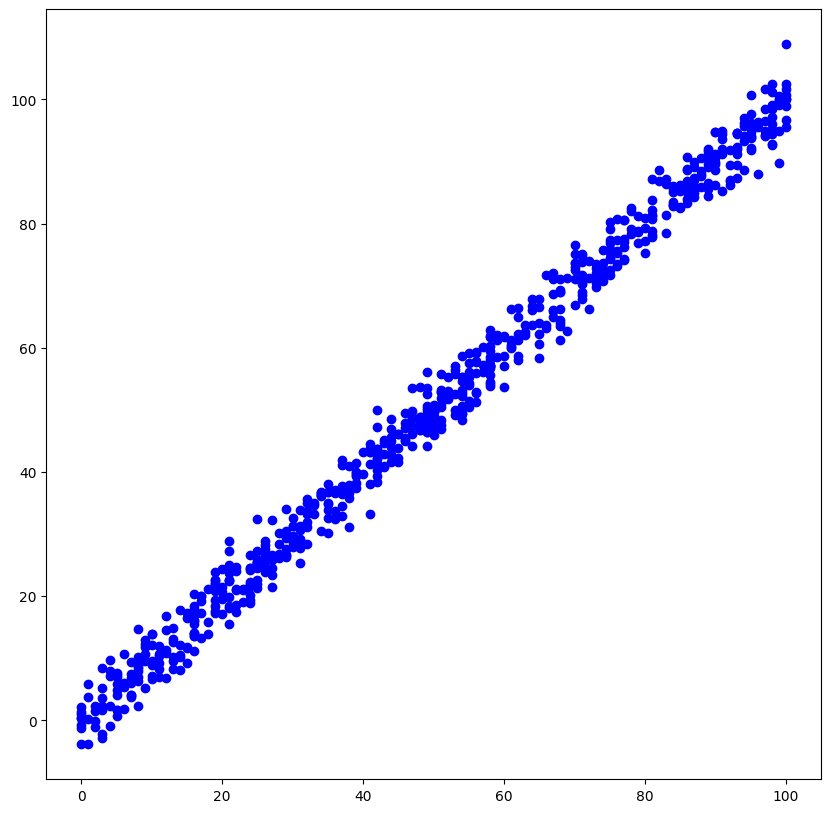

In [10]:
plt.figure(figsize=(10,10))

plt.scatter(df.x,df.y,color='b')

In [11]:
trainx = df.x.to_numpy()
trainy = df.y.to_numpy()
trainx.shape,trainy.shape

((699,), (699,))

In [12]:
trainx = trainx.reshape((699,1)) / 100
trainy = trainy.reshape((699,1)) / 108
trainx.shape,trainy.shape

((699, 1), (699, 1))

In [13]:
trainx = np.c_[trainx,np.ones((699,1))]
trainx.shape

(699, 2)

In [14]:
trainx

array([[0.24, 1.  ],
       [0.5 , 1.  ],
       [0.15, 1.  ],
       ...,
       [0.82, 1.  ],
       [0.66, 1.  ],
       [0.97, 1.  ]])


The expression for mean square error loss is as follows:
\begin{equation}
Loss = \frac{1}{N}\sum(y_i-\hat{y}_{i})^{2}
\end{equation}

\begin{equation}
Loss= (y_i-wx_i-b)^{2},
\end{equation}
\
where,
- $N$ = number of samples,
- $\hat{y}_i$ = predicted value of $i^{th}$ sample.

In [15]:
def L2Norm(y,yhat):
    return (y-yhat)**2

Gradients of loss w.r.t $w$ (weights) and $b$ (bias) are given by, 
\begin{equation}
\frac{\partial L}{\partial w} = -\frac{2}{N}\sum{x_i(y_i-\hat{y}_i)},
\end{equation}

\begin{equation}
\frac{\partial L}{\partial b} = -\frac{2}{N}\sum{(y_i-\hat{y}_i)}.
\end{equation}


In [16]:
def gradients(y,yhat,x):
    return -2*(y-yhat)*x #2x1 is the shape of this vector

Weights are updated as follows,
\begin{equation}
w_{new} = w - lr* \frac{\partial L}{\partial w} 
\end{equation}

\begin{equation}
b_{new} = b- lr* \frac{\partial L}{\partial b}
\end{equation}

In [17]:
weights = np.array([[0.23],[0.69]])

def train(weights,epochs=10,lr=0.01):
    for e in range(epochs):
        total = 0
        print(f'Epoch {e+1}')
        for x,y in zip(trainx,trainy):
            
            x = x.reshape((2,1))
            
            yhat = weights.T.dot(x)
            
            loss = L2Norm(y.item(),yhat.item())
            grad = gradients(y.item(),yhat.item(),x)
            
            weights -= lr*grad
            
            total+=loss 
        print(f'LOss {total/699}')
print('weights Before training: \n',weights)
print('_'*50)
train(weights)
print('_'*50)
print('weights After training:\n ',weights)



weights Before training: 
 [[0.23]
 [0.69]]
__________________________________________________
Epoch 1
LOss 0.03071505721344305
Epoch 2
LOss 0.004805245550150613
Epoch 3
LOss 0.0013309412461015452
Epoch 4
LOss 0.0007833886094672132
Epoch 5
LOss 0.0006971125812023613
Epoch 6
LOss 0.0006835257536145536
Epoch 7
LOss 0.0006813890250746203
Epoch 8
LOss 0.0006810541603486388
Epoch 9
LOss 0.000681002145361591
Epoch 10
LOss 0.0006809942512769301
__________________________________________________
weights After training:
  [[ 0.92652647]
 [-0.00137315]]


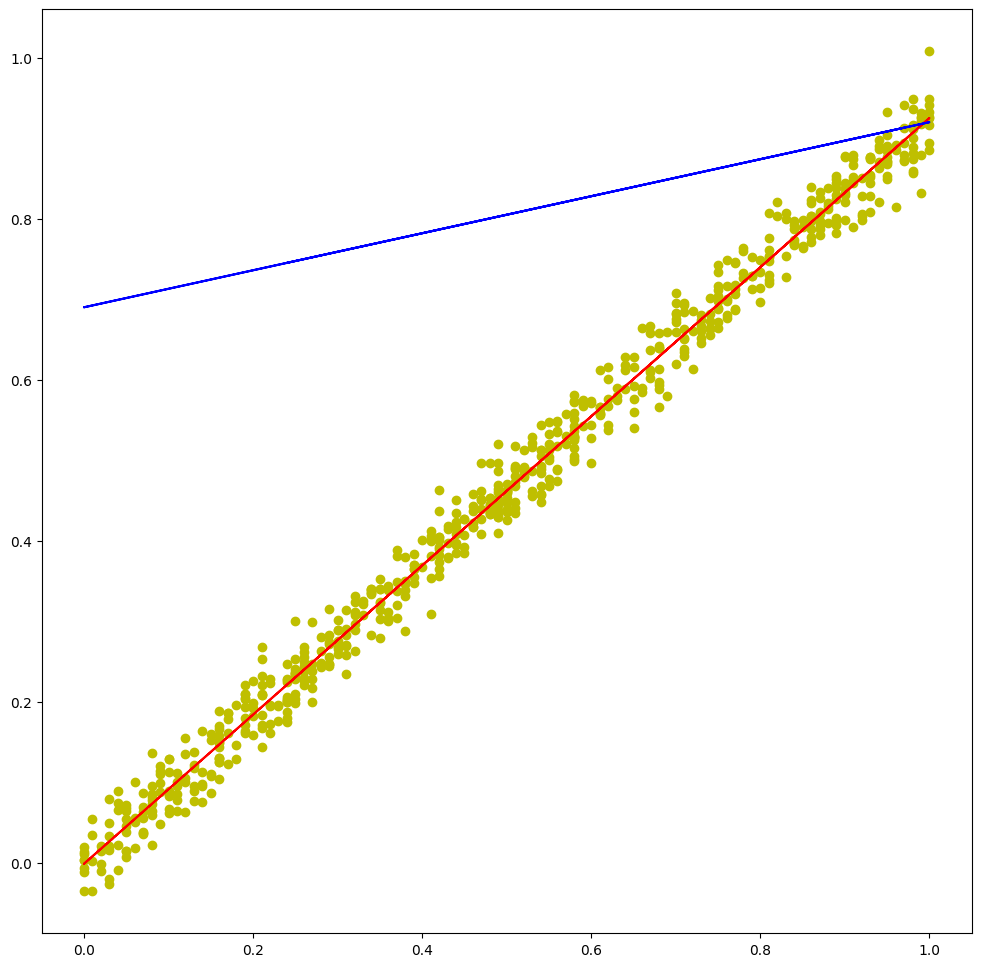

In [18]:
plt.figure(figsize=(12,12))
w = np.array([[0.23],[0.69]])
plt.scatter(df.x/100,df.y/108,color='y')
plt.plot(df.x/100,trainx.dot(weights),color='r')
plt.plot(df.x/100,trainx.dot(w),color='b')

***


In [19]:
test = pd.read_csv('D:/kaggle work/test.csv')
test.isnull().sum().sum()

0

In [20]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [21]:
tx = test.x.to_numpy()/100
ty = test.y.to_numpy()/105

tx = tx.reshape((tx.shape[0],1))
ty = ty.reshape((ty.shape[0],1))
tx = np.c_[tx,np.ones((tx.shape[0],1))]

tx.shape,ty.shape

((300, 2), (300, 1))

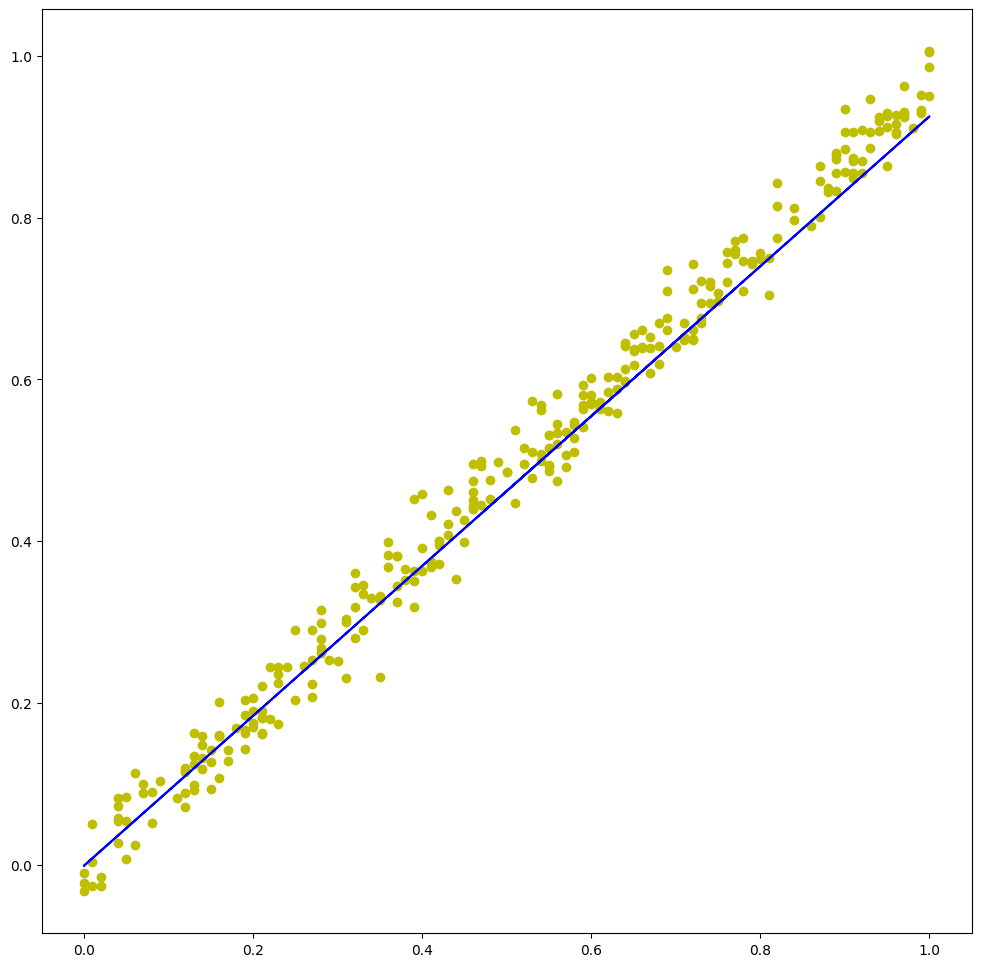

In [22]:
plt.figure(figsize=(12,12))
plt.plot(test.x/100,tx.dot(weights),color='b')
plt.scatter(test.x/100,test.y/105,color='y')

***
### The Normal Equation



\begin{equation}
W = (X^{T}X)^{-1}.(X^{T}Y)
\end{equation}


Checking if determinant of $(X^{T}X)$ is 0 or not, i.e, is $(X^{T}X)$ invertible

\begin{equation}
W_{2*1} = (X_{2*699}^{T}. X_{699*2})^{-1}.(X_{2*699}^{T}Y_{699*1})
\end{equation}

In [23]:
weights_norm = np.linalg.inv(trainx.T.dot(trainx)).dot(trainx.T).dot(trainy)
weights_norm

array([[ 0.92653369],
       [-0.0009932 ]])

In [24]:
((tx.dot(weights)-ty)**2).sum(),((tx.dot(weights_norm)-ty)**2).sum()

(0.37499499589649055, 0.3710895362465242)

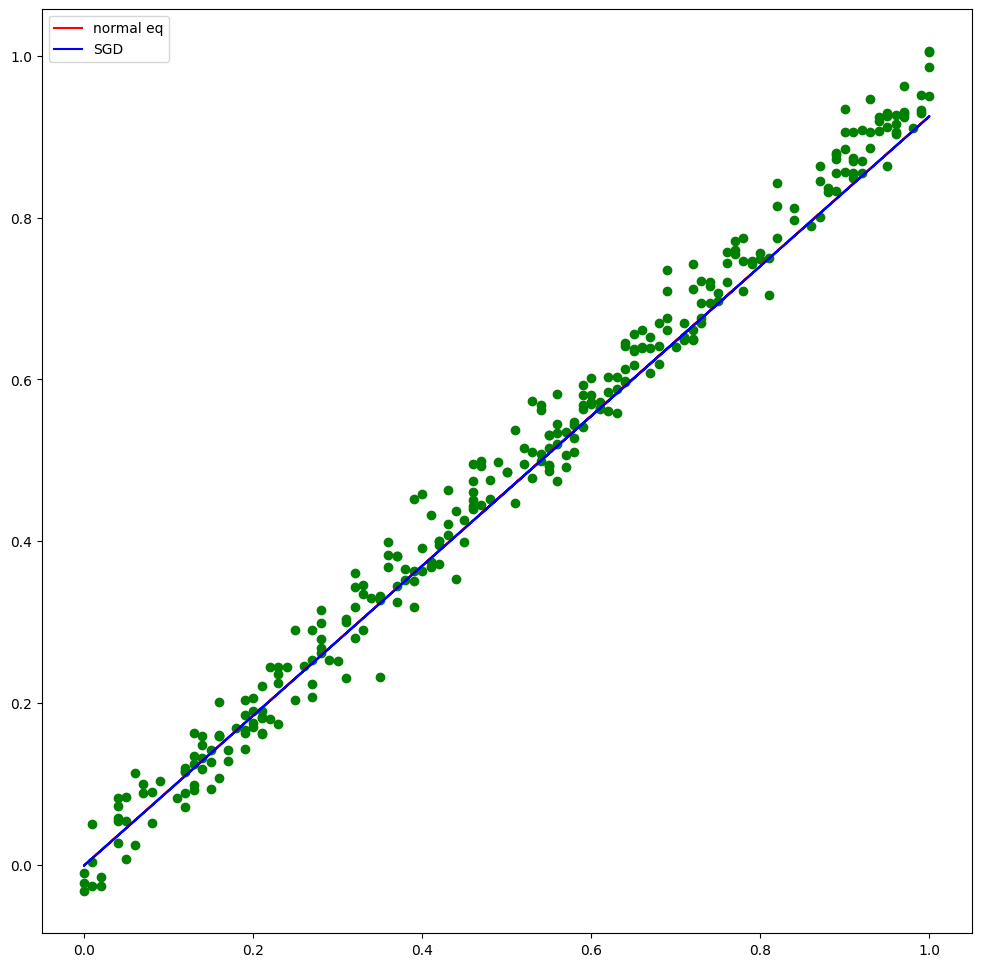

In [25]:
plt.figure(figsize=(12,12))
# plt.plot(test.x/100,tx.dot(weights_norm),color='y')
plt.scatter(test.x/100,test.y/105,color='g')
plt.plot(test.x/100,tx.dot(weights_norm),color='r', label='normal eq')
plt.plot(test.x/100,tx.dot(weights),color='b',label='SGD')
plt.legend()

In [26]:
weights,weights_norm

(array([[ 0.92652647],
        [-0.00137315]]),
 array([[ 0.92653369],
        [-0.0009932 ]]))

***

***